# Task 3

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Load the dataset and rename the 'y' column to 'deposit'


In [2]:
df=pd.read_csv('bank-additional.csv',delimiter=';')
df.rename(columns={'y':'deposit'},inplace=True)


## Displaying First Few Rows

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


## Checking the structure of Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

## Get the number of rows and columns in the DataFrame


In [5]:
df.shape

(4119, 21)

## Display the data types of all columns in the DataFrame


In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

## Get the count of each data type in the DataFrame


In [7]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

## Checking Duplicate

In [8]:
df.duplicated().sum()

0

## Find missing value

In [9]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

## Summary statistics of numeric columns

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Applying Label Encoding to convert categorical values into numeric labels

In [14]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
categorical_columns=df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col]=label_encoder.fit_transform(df[col])

## Displaying First Few Rows after conversion 

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


## Define Feature and Target

In [19]:
from sklearn.model_selection import train_test_split
X =df.drop('deposit',axis=1)
y=df['deposit']
X_subset=X[['age','duration','campaign','previous','emp.var.rate']]
X_train,X_test,y_train,y_test=train_test_split(X_subset,y,test_size=0.3,random_state=42)

## Train the Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf=DecisionTreeClassifier(random_state=42,max_depth=3)
clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

## Evaluate The Model 

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred= clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy*100:.2f}%")
print(classification_report(y_test,y_pred))

Accuracy:88.92%
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1105
           1       0.46      0.28      0.35       131

    accuracy                           0.89      1236
   macro avg       0.69      0.62      0.65      1236
weighted avg       0.87      0.89      0.88      1236



## Visualize the Decision Tree

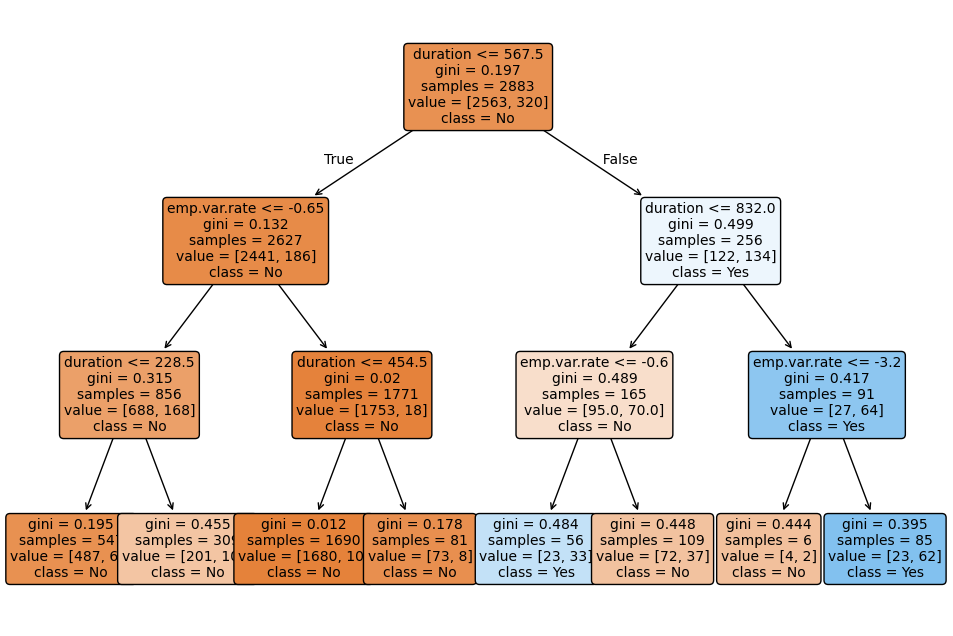

In [29]:
from sklearn.tree import DecisionTreeClassifier
plt.figure(figsize=(12,8))
plot_tree(
    clf,
    feature_names=X_subset.columns,
    class_names=['No','Yes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()
